## 线性回归与感知机分类

---

#### 介绍

监督学习（英语：Supervised learning）是机器学习中最为常见、应用最为广泛的分支之一。本次实验将带你了解监督学习中较为基础的线性模型，并学会使用 scikit-learn 来构建预测模型，用于解决实际问题。

#### 知识点

- 线性回归模型
- 感知机分类模型
- 糖尿病数据的拟合

---

### 线性回归模型

scikit-learn 中包含的线性模型有最小二乘回归、感知机、逻辑回归、岭回归，贝叶斯回归等，由 `sklearn.linear_model` 模块导入。线性模型其实就是通过拟合线性函数去完成样本分类或回归预测。

$$\mathrm{y}(\mathrm{w}, \mathrm{x})=w_{0}+w_{1} \cdot x_{1}+\cdots+w_{p} \cdot x_{p}$$

其中，最小二乘回归、岭回归、贝叶斯回归等是用于解决回归问题。而感知机、逻辑回归被用于解决分类问题。

这里，我们从比较基础的 [<i> 最小二乘法</i>](https://baike.baidu.com/item/%E6%9C%80%E5%B0%8F%E4%BA%8C%E4%B9%98%E6%B3%95) 回归说起。最小二乘法是线性回归中最经典的方法之一，最小二乘的取名即来自于平方损失函数。在 scikit-learn 中，最小二乘法的估计器如下：

| 名称 | 估计器 |
| :---: | :---: |
| 最小二乘回归 | sklearn.linear_model.LinearRegression() |

在最小二乘回归中，不涉及数据处理的情况下，我们使用 scikit-learn 完成该任务只需三步：
1.  选择相应的估计器构建相应的模型 `model`，并设置模型参数。
2.  使用该估计器型提供的 `model.fit()` 方法训练模型。
3.  使用该估计器提供的 `model.predict()` 方法用于预测。

下面，举个简单的例子，我们通过最小二乘回归去拟合二维平面上的一些点。首先，执行上面的第一步，载入估计器并构建模型，其中 `warning` 模块通常用于警告用户一些错误或者过时的用法，这里用 `warnings.filterwarnings('ignore')` 是为了忽略警告，仅供教学方便，自行书写代码时警告也很重要，不建议忽略。

In [1]:
import warnings
from sklearn.linear_model import LinearRegression

warnings.filterwarnings('ignore')
model = LinearRegression() # 调用最小二乘线性回归(第 1 步)
model

LinearRegression()

接下来，使用模型带有的 `fit()` 方法去拟合 3 个点。三个点的特征向量分别为 $[0, 0]$, $[1, 1]$, $[2, 2]$，对应的目标值为 $[1, 2, 3]$。

In [2]:
model.fit([[0, 0], [1, 1], [2, 2]], [1, 2, 3]) # 模型训练(第 2 步)

LinearRegression()

当然，我们也可以从这一步看到模型返回的参数。

训练时，选择的 $[0, 0]$， $[1, 1]$， $[2, 2]$ 这三个点恰好在一条直线上，再结合目标值想象一下它们的空间位置关系。我们可以使用 `model.coef_`, 输出拟合直线 $w$ 项，使用 `model.intercept_` 输出常数项值。

In [3]:
model.coef_, model.intercept_

(array([0.5, 0.5]), 1.0)

如上所示，即实验拟合的函数应该为：
$$y(x)=0.5x_{1}+0.5x_{2}+1$$

当我们输入新的数值，例如 $[3, 3]$ 时，根据上面的函数，因变量的值为 $4$。那么，我们使用模型来预测，看一看结果是否为 $4$

In [4]:
model.predict([[3, 3]]) # 模型预测(第 3 步)

array([4.])

结果的确和我们预想的一致，也标志着我们通过 scikit-learn 完成了一个基础的线性回归问题，而建模的过程仅仅需要简单的 3 步。

上面的例子比较简单，下面我们导入 scikit-learn 内置的 `diabetes` 糖尿病数据集来训练一个复杂一点的最小二乘回归模型。

第一步：导入数据，并将其划分为 70% 的训练集和 30% 的测试集。机器学习中，我们习惯采用这样的比例来划分训练集和测试集。其中训练集用来训练模型，而测试集则用来评估模型。测试集的数据不会出现在训练数据中，这也就类似我们使用了新的数据对训练好的模型进行预测和评估，以保证模型质量真实可靠。

<img width='400px' src="images/train_test_split.png">

下面我们会用到 `train_test_split` 模块，其参数 `test_size` 表示切割比例，`random_state` 设置随机数种子，保证每次随机数结果相同。

In [5]:
from sklearn import datasets # 导入内置数据集模块
from sklearn.model_selection import train_test_split
import numpy as np # 导入数值计算模块

diabetes = datasets.load_diabetes() # 载入糖尿病数据集
print(diabetes.keys())
print(diabetes.data.shape)

# 该数据集的特征有十个，这里只选取第三列的那一个，np.newaxis 为切片后的数据增加一个维度
diabetes_feature = diabetes.data[:, np.newaxis, 2]
diabetes_target = diabetes.target # 设置目标值
print(diabetes_feature.shape)

# 切分数据集为 70% 的训练集和 30% 的预测集
train_feature, test_feature, train_traget, test_target = train_test_split(diabetes_feature, diabetes_target, test_size=0.3, random_state=56)

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
(442, 10)
(442, 1)


第二步：载入最小二乘回归估计器，并训练数据。这一步想必通过上面的例子已经清楚了，注意这里传入的是训练数据。

In [6]:
model = LinearRegression() # 构建最小二乘线性回归模型
model.fit(train_feature, train_traget) # 使用训练集数据训练模型

LinearRegression()

第三步：使用 `model.predict()` 对测试集进行预测，并将结果绘图。

Text(0.5, 1.0, 'LinearRegression Example')

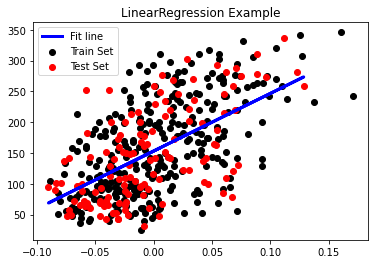

In [7]:
import matplotlib.pyplot as plt # 导入 matplotlib 绘图模块
%matplotlib inline 

# 绘图
plt.scatter(train_feature, train_traget, color='black') # 绘制训练集散点图
plt.scatter(test_feature, test_target, color='red') # 绘制测试集散点图
plt.plot(test_feature, model.predict(test_feature), color='blue', lw=3) # 使用测试集进行预测并绘制拟合直线

# 绘制图例
plt.legend(('Fit line', 'Train Set', 'Test Set'), loc=0)
plt.title('LinearRegression Example')

如上图所示，我们可以更加直观地看出采用最小二乘回归进行线性拟合的结果。

对于其他常见的线性回归模型，它们和最小二乘线性回归模型非常相似，只是采用了不同的损失函数。

例如，岭回归采用了带 L2 惩罚项的平方和损失函数。
$$\min _{w}\|X w-y\|_{2}^{2}+\alpha\|w\|_{2}^{2}$$

而另一种常见的 Lasso 回归，采用了带 L1 惩罚项的平方损失函数。
$$ \min _{w} \frac{1}{2 n_{\text {samples}}}\|X w-y\|_{2}^{2}+\alpha\|w\|_{1}$$

下面列举了一些常见的广义线性回归模型，及它们在 scikit-learn 中对应的估计器。

| 名称 | 估计器 |
| :---: | :---: |
| 贝叶斯岭回归 | sklearn.linear_model.BayesianRidge() |
| Lasso 回归 | sklearn.linear_model.Lasso() |
| 岭回归 | sklearn.linear_model.Ridge() |
| 随机梯度下降回归 | sklearn.linear_model.SGDRegressor() |
| 鲁棒回归 | sklearn.linear_model.HuberRegressor() |

这些方法相对于普通最小二乘回归模型而言，均增加了一些惩罚项，这样会提高模型的泛化能力，在实际应用中效果可能会好一些。有一些方法我们会在实验五中做统一的比较。

### 线性分类模型

除了线性回归，scikit-learn 还提供了一些解决线性分类的方法。其中，感知机就是非常有代表性的线性分类模型。

[<i> 感知机</i>](https://zh.wikipedia.org/zh-hans/%E6%84%9F%E7%9F%A5%E5%99%A8) 是一个经典的二分类方法，由 Rosenblatt 于 1957 年时提出。它是神经网络和支持向量机的基础。感知机模型非常简单，输入为一些特征向量，输出则由正类和负类组成。而输入和输出之间，则是由符号函数 $sign(x)$ 连接。
$$ f(x)=\operatorname{sign}(w \cdot x+b) ;      \operatorname{sign}(x)=\left\{\begin{array}{ll}{+1, x \geq 0} \\ {-1, x \leq 0}\end{array}\right.$$

感知机的损失函数是错误分类点到分离超平面之间的距离总和，其学习策略同样也是损失函数最小化。
$$ \min \sum y(w \cdot x+b)$$

在 scikit-learn 中，实现感知机通过 `sklearn.linear_model.Perceptron()` 估计器完成。

下面，我们通过一个例子来展示感知机的分类过程。首先，使用 scikit-learn 提供的 `make_classification` 分类生成器生成一组可被二分类的二维数组作为数据集，其参数 `n_samples` 默认值为 100，`n_features` 总特征数量，`n_classes` 默认值为 2，即两类或两个标签。

In [8]:
from sklearn.datasets import make_classification # 导入分类数据生成模块

# 随机生成一组可以被二分类的数据
X, y = make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=1)

# 查看数组形状
print(X.shape, y.shape)
print(y)

(100, 2) (100,)
[0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1
 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0
 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1]


这里，我们使用 Matplotlib 将该数据集绘制出来，直观上看看生成的数据集结构。

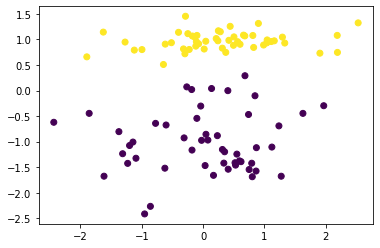

In [9]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y) # 绘制数据集散点图

我们可以看到，数据集分为 2 种颜色的样本点，并呈现出明显的线性界线。接下来，我们使用感知机对该数据集进行分类训练。

In [10]:
from sklearn.linear_model import Perceptron

# 将数据集划分为 70% 训练集和 30% 测试集
train_feature, test_feature, train_traget, test_target = train_test_split(X, y ,test_size=0.3, random_state=56)
# 建立感知机模型，使用默认参数
model = Perceptron()
# 使用训练集训练模型
model.fit(train_feature, train_traget)

Perceptron()

训练结束后，我们将测试数据输入模型中，得到相应的预测结果。

In [11]:
preds = model.predict(test_feature) # 预测并得到预测结果
preds

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0])

然后将预测结果与真实结果进行比较，从而得到模型的分类准确度。

准确度表示正确预测的样本占全部样本的比例，是用于评估分类模型的常用指标之一，我们得到的 `preds` 是模型的预测结果，而真实结果为 `test_target`。接下来，可以通过 scikit-learn 提供的 [<i> `accuracy_score`</i>](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) 计算出分类准确度，我们会在最后一个实验详细介绍有关于验证评估的相关方法。

In [12]:
from sklearn.metrics import accuracy_score

accuracy_score(test_target, preds) # 先传入真实值，再传入预测值

1.0

返回的结果即是测试集预测分类准确度，如果为 `1.0` 则表示预测全部正确，分类准确度为 100%。

下面，我们使用 Matplotlib 将训练数据和测试数据绘制在原图上，并绘制出感知机分类时的决策边界。

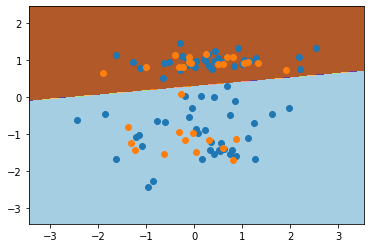

In [14]:
# 创建一个绘图矩阵方便显示决策边界线
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy =np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

fig, ax = plt.subplots()
# 绘制决策边界
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)
# 控制训练和测试数据
ax.scatter(train_feature[:, 0], train_feature[:, 1])
ax.scatter(test_feature[:, 0], test_feature[:, 1])

### 实验总结

线性模型是机器学习中十分简单基础的模型。但是由于其本身的特点，只能用于二分类问题。对于实际生活中经常遇到的多分类及非线性分类问题，无法适用。但对于刚刚入门机器学习的朋友来说，线性分类模型是不错范例。希望大家能掌握本次试验的全部内容。